# Step 1: Load and Preprocess Data

In [2]:
# Step 1: Loading and Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
X.head()

Shape of X: (442, 10)
Shape of y: (442,)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [3]:
# Check for missing values
print("Missing values in dataset:")
print(X.isnull().sum())

Missing values in dataset:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Feature scaling complete.")

Feature scaling complete.


# Step 2: Exploratory Data Analysis

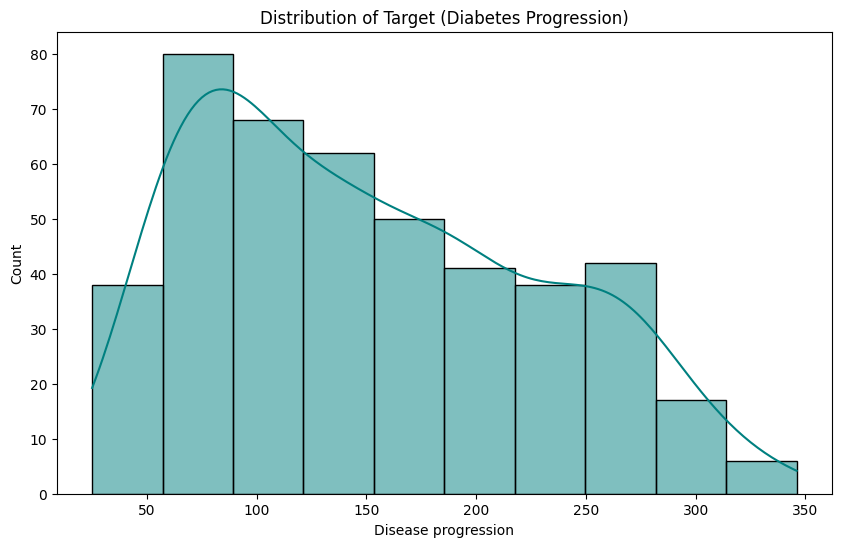

In [5]:
# Step 2: EDA
plt.figure(figsize=(10,6))
sns.histplot(y, kde=True, color='teal')
plt.title("Distribution of Target (Diabetes Progression)")
plt.xlabel("Disease progression")
plt.show()

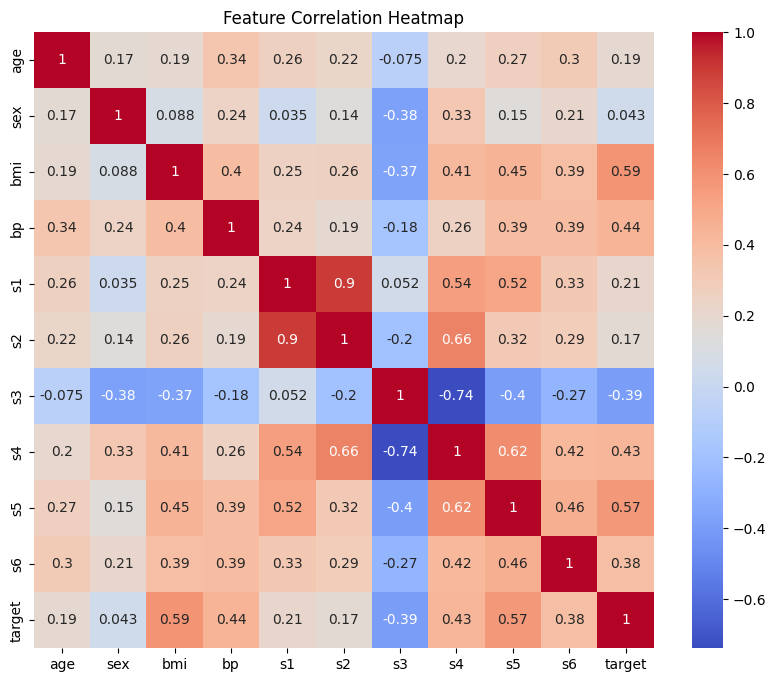

In [6]:
# Combine for correlation
df = pd.concat([X, y], axis=1)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
Name: target, dtype: float64


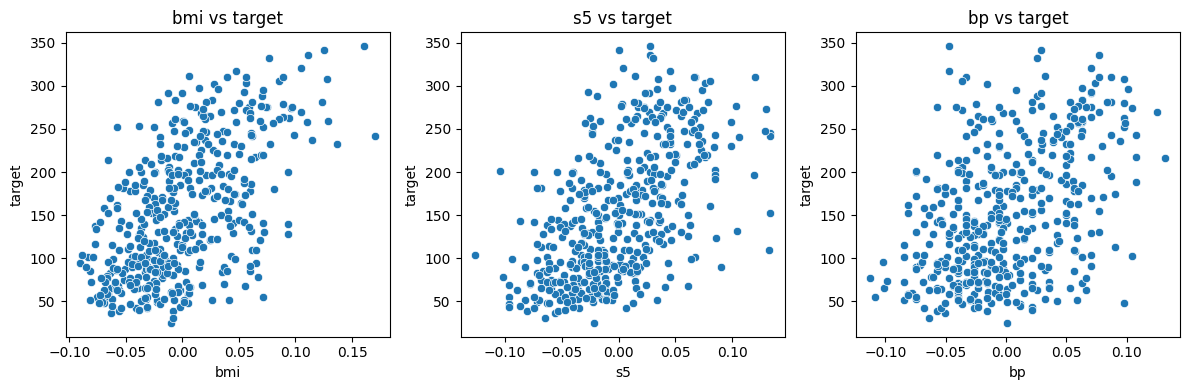

In [7]:
# Top 3 correlated features with target
corr = df.corr()['target'].sort_values(ascending=False)
print(corr.head(6))

top_features = corr.index[1:4]  # top 3 excluding 'target'
plt.figure(figsize=(12,4))
for i, col in enumerate(top_features):
    plt.subplot(1,3,i+1)
    sns.scatterplot(x=df[col], y=df['target'])
    plt.title(f"{col} vs target")
plt.tight_layout()
plt.show()

# Step 3: Build the ANN Model

In [8]:
# Step 3: Build ANN
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

# Split data first
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Define ANN model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')  # regression output
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

# Step 4: Train the Model

In [9]:
# Step 4: Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    verbose=1
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 28236.5781 - mae: 149.2732 - val_loss: 16245.0195 - val_mae: 110.1393
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16916.6680 - mae: 109.1219 - val_loss: 4596.2139 - val_mae: 52.0660
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6748.4839 - mae: 63.4795 - val_loss: 3913.1968 - val_mae: 45.7451
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4230.8828 - mae: 51.3863 - val_loss: 3363.0388 - val_mae: 43.2876
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3384.0210 - mae: 46.0220 - val_loss: 3114.2085 - val_mae: 42.9112
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2783.3428 - mae: 42.2506 - val_loss: 3030.6787 - val_mae: 42.9159
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2957.0488 - mae: 43.1618 - val_loss: 3173.4824 - val_mae: 44.3767
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2692.8091 - mae: 40.4916 - val_loss: 2910.6870 - val_mae: 4

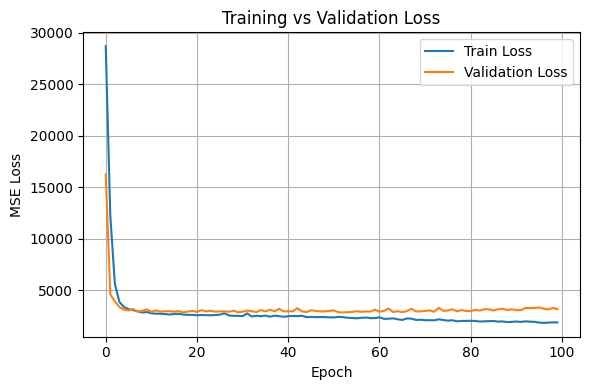

In [10]:
# Plot loss curves
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# # Step 5: Evaluate Model

In [12]:
# Step 5: Evaluation
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R² Score: {r2:.3f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step
Test MSE: 3196.358
Test R² Score: 0.397


# Step 6: Improve the Model

In [13]:
# Step 6: Improved Model
improved_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

improved_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.005),
    loss='mse',
    metrics=['mae']
)

history2 = improved_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=16,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 29856.8594 - mae: 152.1990 - val_loss: 8352.1562 - val_mae: 71.3048
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9461.4629 - mae: 78.3484 - val_loss: 3574.3340 - val_mae: 44.4220
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4842.2739 - mae: 54.1340 - val_loss: 3099.3494 - val_mae: 42.6673
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3531.2554 - mae: 46.7634 - val_loss: 2983.9819 - val_mae: 41.1414
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3672.0112 - mae: 47.9419 - val_loss: 2884.6875 - val_mae: 42.5439
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2935.7073 - mae: 42.2340 - val_loss: 2789.4670 - val_mae: 41.4112
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3367.8318 - mae: 46.8607 - val_loss: 2823.3750 - val_mae: 40.4242
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3251.6416 - mae: 46.0313 - val_loss: 2749.0740 - val_mae: 40.81

In [14]:
y_pred2 = improved_model.predict(X_test).flatten()
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print(f"Improved Test MSE: {mse2:.3f}")
print(f"Improved Test R² Score: {r2_2:.3f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step
Improved Test MSE: 3630.590
Improved Test R² Score: 0.315


# Visualize Predictions

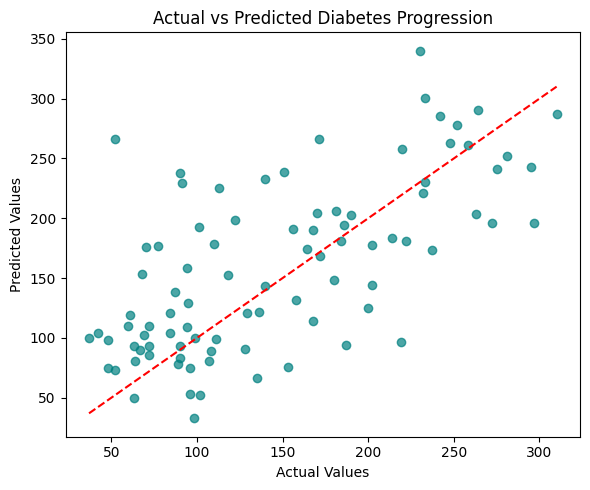

In [15]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred2, color='teal', alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Diabetes Progression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()